# DSCI 512 Lecture 4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
from IPython.display import display
import itertools
from collections import defaultdict
import pandas as pd
import sklearn.neighbors
%matplotlib inline

Outline: 

- Recursive data structures (15 min)
- Trees, binary search trees (20 min)
- True/False questions (10 min)
- Break (5 min)
- Nearest neighbours intro (5 min)
- $k$-d trees (10 min)
- Amortization (5 min)
- True/False questions (10 min)

## Motivation for recursion

- Last class we talked about recursive functions, which call themselves. 
- We saw how this made the binary search code more elegant.
- Today we'll see a stronger motivation for recursive functions and recursive thinking. 

## Recursive data structures (15 min)

- We have talked about nested data structures, like:

In [2]:
x = [[1, 2, 3], ["a", "b", "c"]]
x

[[1, 2, 3], ['a', 'b', 'c']]

- This is a list of lists. 
- We also had dicts of dicts in Lab 1; another example is the JSON format.
- We can also have a doll within a doll:

![](https://upload.wikimedia.org/wikipedia/commons/7/71/Russian-Matroshka.jpg)

(Image attribution to Fanghong, from [Wikipedia article](https://en.wikipedia.org/wiki/Matryoshka_doll).)

- I am going to call these "nested data structures". We could also call them "hierarchical".
- But now I want to talk about something else: where the _definition_ of the data type is itself recursive.
- Consider a Russian Doll _data type_. Inside is some small item (or some air molecules, at least!), plus another doll.
- I'll actually use the metaphor of a magical treasure box, which I prefer slightly - but same idea.

In [3]:
class TreasureBox:
    """
    A linked list, aka treasure box. The user add and retrive items from it.
    """

    def __init__(self, treasure):
        self.innerTreasureBox = None
        self.treasure = treasure

    def append_outer(self, treasure):
        """Add a new treasure box to the outside by putting lastest box inside it.

        Parameters
        ----------
        treasure : object
           the label designated to the newly covered treasure box

        Returns
        -------
        new_box : TreasureBox
             new treasure box object containing previous boxes inside    

        Example
        --------
        >>> box = box.append_outer(10)
        """

        new_box = TreasureBox(treasure)
        new_box.innerTreasureBox = self
        return new_box

    def append_inner(self, treasure):
        """Add a new treasure box inside the innermost current box.

        Parameters
        ----------
        treasure : object 
           the label designated to the newly inserted treasure box

        Returns
        -------
        new_box : TreasureBox
             new treasure box object contained within innermost box of 
             the last treasure box    

        Example
        --------
        >>> box.append_inner(55)
        """

        if self.innerTreasureBox is None:
            self.innerTreasureBox = TreasureBox(treasure)
        else:
            self.innerTreasureBox.append_inner(treasure)
        return self

    def get(self, depth):
        """Get the treasure by going depth levels deep into the treasure boxes.

        Parameters
        ----------
        depth : int 
           the depth of which to unwrap the treasure box 

        Returns
        -------
        object : 
             the treasure retrieved after recursing the specified depth. 

        Example
        --------
        >>> box = TreasureBox(12)
        >>> box = box.append_outer(9)
        >>> box = box.append_inner(55)
        >>> box.get(0)
        9 
        >>> box.get(1)
        55
        """

        if depth == 0:
            return self.treasure

        if self.innerTreasureBox is None:
            return None  # Index out of bounds

        return self.innerTreasureBox.get(depth-1)

In [4]:
box = TreasureBox("Initial box")

box = box.append_outer("Wrapped initial box")
box = box.append_outer("Wrapped second box")

To do in class: draw a picture of what this looks like.

In [5]:
box.get(0)

'Wrapped second box'

In [6]:
box.get(1)

'Wrapped initial box'

In [7]:
box.get(2)

'Initial box'

In [8]:
box.get(3)

In [10]:
box = TreasureBox("Initial box")

box = box.append_inner("Box in initial box")
box = box.append_inner("Box in the second box")

In [11]:
box.get(0)

'Initial box'

In [12]:
box.get(1)

'Box in initial box'

In [13]:
box.get(2)

'Box in the second box'

In [14]:
box.get(3)

- In computer science, this is called a [linked list](https://en.wikipedia.org/wiki/Linked_list).
- It's not just a nested data structure (list of lists); the definition of the data type itself is recursive. 

Take-home ideas:

- We have a relationship between recursive function calls (see `append_inner` and `get`) and recursive data types (see `__init__`).
- The signature of a recursive data type is that an instance of the class contains one or more instances of that type.
  - In our case, each `TreasureBox` contains another `TreasureBox` (or `None`).
- Recursion is an important idea in understanding algorithms _and_ data structures.

## Trees, binary search trees (20 min)

- Trees are recursive data structures, like the linked lists above.
- In lab, you will implement a set based on trees instead of a hash table.
  - In particular this data structure is called a [binary search tree](https://www.geeksforgeeks.org/binary-search-tree-data-structure/).
  - We will talk about them a bit to help with the lab.
- Below we have a generic tree:

![](https://upload.wikimedia.org/wikipedia/commons/2/2e/Organizational_chart.svg)

(Image attribution to TotoBaggins, from [Wikipedia article](https://en.wikipedia.org/wiki/Organizational_chart).)

Tree terminology:

- A tree is either empty or a node with zero or more _children_ that are themselves trees (or "subtrees").
- If $X$ is the child of $Y$, then $Y$ is the _parent_ of $X$ (e.g. Captain A is a child of Colonel B; Colonel B is the parent of Captain A).
- The _root_ is the only node without a parent (e.g. General).
- A _leaf_ is a node that does not have children (e.g. Private A).
- An _internal node_ is a node that is not a leaf (e.g. Captain A).
- The _height_ of the tree is the largest number of edges connecting the root to a leaf (here, 4).


Let's build a simple binary tree class using Python. A binary tree is a tree where each node has at most 2 children (the above is not a binary tree). So each tree node will have a label and two children.

In [16]:
class BinaryTree:
    
    def __init__(self, label):
        self.label = label
        self.left = None  # type = BinaryTree
        self.right = None # type = BinaryTree
    
    def contains(self, target):
        if self.label == target:
            return True
        
        leftContains = False if self.left  is None else self.left.contains(target)
        rightContains= False if self.right is None else self.right.contains(target)
        return leftContains or rightContains

    # We would want some more functions here, e.g. to add/remove things from the tree.

Let's manually build a binary tree containing some of the information in the example above:

In [17]:
root = BinaryTree("General")
root.left = BinaryTree("Colonel A")
root.right = BinaryTree("Colonel B")
root.right.left = BinaryTree("Captain A")
root.right.right = BinaryTree("Captain B")

In [18]:
root.contains("Clown")

False

In [19]:
root.contains("Captain B")

True

In [20]:
type(root)

__main__.BinaryTree

In [21]:
type(root.left)

__main__.BinaryTree

- The key idea here is that, like `TreasureBox`, the `BinaryTree` object stores more binary tree objects.
- However, each `TreasureBox` only stores one `TreasureBox`, whereas each `BinaryTree` stores **two** `BinaryTree`s.

#### Binary search trees (BSTs)

- A _binary tree_ is a tree where each node has at most 2 children.
- A binary tree is a _binary search tree_ if, for all nodes, all keys in its left subtree are smaller than its key, and all keys in its right subtree are larger than its key.

In [22]:
"abc" < "zzz"

True

To do in class: draw out a binary search tree, show the process of adding nodes.

- Requirement to use BSTs: we must be able to compare keys.
- Compare this to a hash table: we need to be able to hash the keys. 

Computational complexity: 

- Binary search trees (BSTs) can be slow if they become very unbalanced (think of adding numbers in increasing order).
- Industrial strength implementations stay balanced and are still efficient.
- Deletion is more tricky and we won't cover it here.
- But the take-home message is that search/insert/delete all run in $O(\log n)$ time, which is pretty fast.

## True/False questions (10 min)

1. If you have a `TreasureBox` with $n$ items, appending to the outside (start) is $O(n)$.
2. If you have a `TreasureBox` with $n$ items, appending to the inside (end) is $O(n)$.
3. A `TreasureBox` contains a copy of itself.
4. A binary tree of height 4 can have at most 8 leaves.

## Break (5 min)

---------

Note: the following topics do not appear on lab 2, but may appear on quiz 1.

---------

## Nearest neighbours intro (5 min)

- A common problem (DSCI 571, 563, more) is to find the _nearest neighbours_ of a point.
- We can start in 2D:

In [4]:
# You can ignore the code - we'll just look at the plot
###

# Creating Data
n = 20
np.random.seed(1)
X = np.random.rand(n, 2)

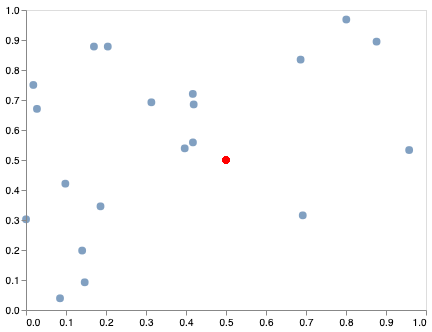

In [5]:
# Creating Dataframe
data = pd.DataFrame({'x0': X[:, 0], "x1" : X[:, 1]})
data['m0'] = .5
data['m1'] = .5

# Creating Plot
chart1 = alt.Chart(data).mark_circle(size=60).encode(
    x= alt.X('x0',
             axis=alt.Axis(grid=False)),
    y = alt.Y('x1',
             axis=alt.Axis(grid=False)))


chart2 = alt.Chart(data).mark_circle().encode(
    x= alt.X('m0',
              axis=alt.Axis(title = "")),
    y = alt.Y('m1',
               axis=alt.Axis(title = "")),
    color = alt.value('red'),
    size = alt.value(50)
)

chart1 + chart2

- Which blue points are nearest to the red ("query") point?
  - To define "nearest" we need a notion of _distance_.
  - For now, we'll use Euclidean distance (the one you're used to from day-to-day life).
  - In future courses, this might change.
  - Choosing a distance metric is actually important in machine learning.

The algorithmic approach is:

1. Find the distance from the red point to all the blue points.
2. Find the smallest distances.

In [6]:
# It's OK if you don't understand this code, especially during lecture
# (It uses numpy broadcasting, which is covered in the second half of DSCI 523.)


def nearest_neighbour(data, query):
    """
    Find the point in the data that is nearest to the query point.

    Parameters
    ----------
    data : numpy.ndarray
        a 2D array containing the points as rows
    query : numpy.ndarray
        a 1D array containing the query point
    
    Returns
    -------
    int
        the index of the nearest point
                 
    Example
    --------
    >>> array = np.array([[1, 1], [2, 5], [5, 6], [3, 0], [9, 9]])
    >>> nearest_neighbour(array, [10, 10])
    4
    """
    
    if query.ndim == 1:
        query = query[None]

    return np.argmin(np.sum((data - query)**2, axis=1))

In [7]:
print(X)

[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01]
 [4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01]
 [2.73875932e-02 6.70467510e-01]
 [4.17304802e-01 5.58689828e-01]
 [1.40386939e-01 1.98101489e-01]
 [8.00744569e-01 9.68261576e-01]
 [3.13424178e-01 6.92322616e-01]
 [8.76389152e-01 8.94606664e-01]
 [8.50442114e-02 3.90547832e-02]
 [1.69830420e-01 8.78142503e-01]
 [9.83468338e-02 4.21107625e-01]
 [9.57889530e-01 5.33165285e-01]
 [6.91877114e-01 3.15515631e-01]
 [6.86500928e-01 8.34625672e-01]
 [1.82882773e-02 7.50144315e-01]]


In [8]:
query = np.array([0.5, 0.5])
nn = nearest_neighbour(X, query)
nn

8

In [9]:
X[8]

array([0.4173048 , 0.55868983])

**Question:** what is the time complexity of `nearest_neighbour` if we have $n$ points in $k$ dimensions?

<br><br><br><br><br><br><br><br>

**Answer:** $O(nk)$, because we have to loop over all $n$ points, and computing the distance requires looping over the $k$ dimensions.

- Problem: this may be way too slow!
- For example, if you want to find similar items on Amazon, and they have a billion items, you don't want to have to look through _all_ of them every time.

## $k$-d trees (10 min)


- Sometimes we speed things up with faster algorithms.
  - We'll see a lot of that in lab 4. 
- But, as we've seen with trees and hash tables, sometime we speed things up with _better data structures_. 
- One of the classic ways to speed up nearest neighbours is a data structure call the [$k$-d tree](https://en.wikipedia.org/wiki/K-d_tree).
- (Optional) Warning: the use of the letter $k$ here is a bit unfortunate.
  - In future machine learning courses, we'll use $d$ instead of $k$.
  - This will also help avoid confusion with $k$-nearest neighbours, which is a totally different $k$.
  - But I do understand not wanting to call them $d$-d trees... so we'll use $k$ for today.

In [31]:
# Students:
# You do not need to read/understand this code,
# But I think you're capable of understanding it with a bit of time spent.
# Feel free to ask if you have questions!


class KDTree:
    """A k-d tree data structure for fast nearest neighbour searches"""

    def __init__(self):

        self.location = None
        self.leftSubTree = None
        self.rightSubTree = None
        self.dim = None
        self.data = None

    def build(self, data, depth=0):
        """
        Build the k-d tree from the given data.
        Implementation inspired by https://en.wikipedia.org/wiki/K-d_tree

        Parameters
        ----------
        data : numpy.ndarray
            a 2D array where each row is a point in space
        depth : int 
            this can be ignored, for internal bookkeeping (default: 0)    
        """
        nrows = data.shape[0]
        self.dim = depth % data.shape[1]
        self.data = data

        self.location = np.median(data[:, self.dim])
        # above, or just data[nrows//2,dim] after sorting
        # although this one will average if there's a tie.

        if nrows == 1:
            return

        data = data[np.argsort(data[:, self.dim])]

        self.leftSubTree = KDTree()
        self.leftSubTree.build(data[:nrows//2], depth+1)

        self.rightSubTree = KDTree()
        self.rightSubTree.build(data[nrows//2:], depth+1)

    def approximateNearestNeighbour(self, query):
        """
        Find the nearest neighbor to the query point.
        However, this is just approximate; it finds a point in
        the same rectangle, not necessarily the actual nearest neighbour.
        This is just for educational purposes; a correct algorithm
        exists but it's too messy to put here.

        Parameters
        ----------
        query : numpy.ndarray 
            a point in space

        Returns
        -------
        numpy.ndarray
            the coordinates of the point closest to the query
        """
        if self.data.shape[0] == 1:
            return self.data[0]

        if query[self.dim] < self.location:
            return self.leftSubTree.approximateNearestNeighbour(query)
        else:
            return self.rightSubTree.approximateNearestNeighbour(query)

    def plot2d(self, depth=1, minx=0.0, maxx=1.0, miny=0.0, maxy=1.0):
        """
        Plot the k-d tree.

        Parameters
        ----------
        depth : int
            how deep to go down the tree when plotting (defult: 0)
        minx : int
            the left edge of the plot (default: 0.0)
        maxx : int
            the right edge of the plot (default: 1.0)
        miny : int
            the bottom edge of the plot (default: 0.0)
        maxy : int
            the top edge of the plot (default: 0.0)

        Returns
        -------
        numpy.ndarray
            the coordinates of the point closest to the query    
        """

        data = pd.DataFrame({'x0': self.data[:, 0], "x1": self.data[:, 1]})
        chart1 = alt.Chart(data).mark_circle(size=60).encode(
            x=alt.X('x0',
                    axis=alt.Axis(grid=False)),
            y=alt.Y('x1',
                    axis=alt.Axis(grid=False)))
        charts_list = [chart1]
        if depth == 0:
            return

        if self.dim == 0:
            data2 = pd.DataFrame(
                {'x0': (self.location, self.location), "x1": (miny, maxy)})
            chart2 = alt.Chart(data2).mark_line().encode(
                x=alt.X('x0',
                        axis=alt.Axis(grid=False)),
                y=alt.Y('x1',
                        axis=alt.Axis(grid=False)))
            charts_list.append(chart2)

            if self.leftSubTree is not None:
                chart0l = self.leftSubTree.plot2d(
                    depth-1, minx=minx, maxx=self.location, miny=miny, maxy=maxy)
                charts_list.append(chart0l)
            if self.rightSubTree is not None:
                chart0r = self.rightSubTree.plot2d(
                    depth-1, minx=self.location, maxx=maxx, miny=miny, maxy=maxy)
                charts_list.append(chart0r)
        elif self.dim == 1:
            data3 = pd.DataFrame(
                {'x0': (minx, maxx), "x1": (self.location, self.location)})
            chart3 = alt.Chart(data3).mark_line().encode(
                x=alt.X('x0',
                        axis=alt.Axis(grid=False)),
                y=alt.Y('x1',
                        axis=alt.Axis(grid=False)))
            charts_list.append(chart3)
            if self.leftSubTree is not None:
                chart1l = self.leftSubTree.plot2d(
                    depth-1, minx=minx, maxx=maxx, miny=miny, maxy=self.location)
                charts_list.append(chart1l)
            if self.rightSubTree is not None:
                chart1r = self.rightSubTree.plot2d(
                    depth-1, minx=minx, maxx=maxx, miny=self.location, maxy=maxy)
                charts_list.append(chart1r)

        params = list(filter(None, charts_list))
        return alt.layer(*params).encode()

        # alt.layer(*params).display()
        #alt.layer(whisker_low, box, whisker_high, midline, data=data)

Basic idea:

- In each recursive step, there is a certain number of datapoints. If there's only one, we're done.
- Otherwise, for one of the two dimensions (we alternate back and forth), find the median value along the dimension.
- Split the data into two subsets based on being above or below that median, and build a (sub)tree for each of those subsets.
- Starting from the full dataset, you will create a tree where each leaf is a datapoint.
- You can find an approximate nearest neighbour by traversing the down the tree using the same decision points as were used to original split the data; the final leaf is the desired neighbour.

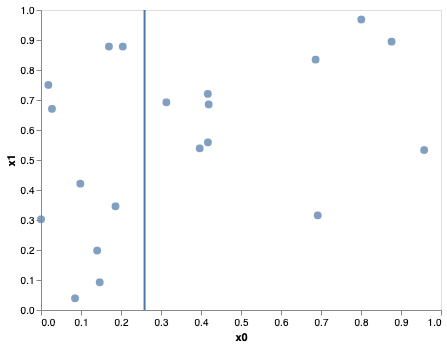

In [32]:
kdt = KDTree()
kdt.build(X)
kdt.plot2d(depth=1)

In [33]:
kdt = KDTree()
kdt.build(X)

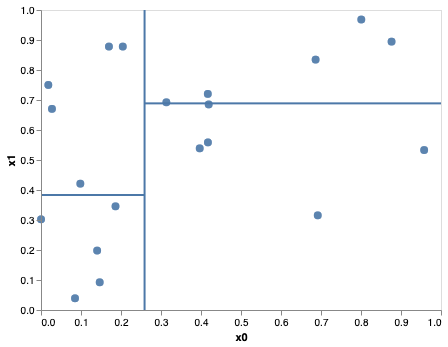

In [34]:
kdt.plot2d(depth=2)

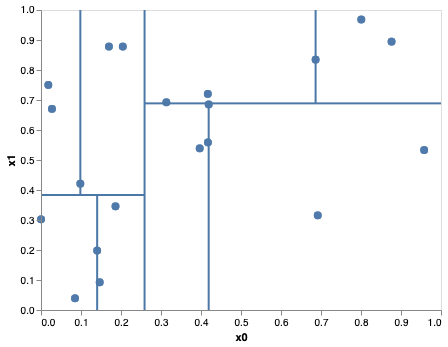

In [35]:
kdt.plot2d(depth=3)

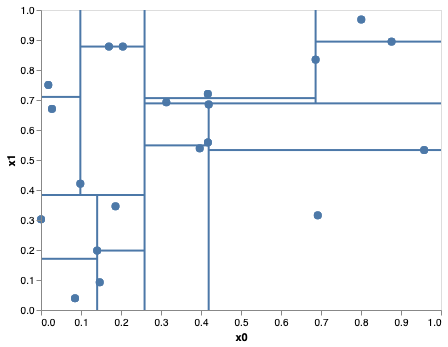

In [36]:
kdt.plot2d(depth=4)

In [37]:
kdt.approximateNearestNeighbour(np.array([1, 1]))

array([0.87638915, 0.89460666])

In [11]:
X[nearest_neighbour(X, np.array([1,1]))]

array([0.87638915, 0.89460666])

In [39]:
kdt.approximateNearestNeighbour(np.array([0.5, 0.5]))

array([0.69187711, 0.31551563])

In [13]:
X[nearest_neighbour(X, np.array([0.5,0.5]))]

array([0.4173048 , 0.55868983])

- Doesn't work perfectly here, but there is a fast correct algorithm, which is beyond the scope of the course.
  - See [`sklearn.neighbors.KDTree`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree).
- However, $k$-d trees get slow when the number of dimensions is large.
- Some alternative methods are discussed below.

#### Timing experiments

We'll time scikit-learn's `KDTree` and compare it to brute force.

In [41]:
n_sizes = [100, 1000, 10_000, 100_000]

results = defaultdict(list)
results["n"] = n_sizes

d = 10

for n in n_sizes:
    print('n: ', n)
    X = np.random.rand(n, d)
    query = np.random.rand(1, d)

    print("  KDTree")
    time = %timeit -q -o -r 3 sklearn.neighbors.KDTree(X)
    results["KDTree init"].append(time.average)
    KDT = sklearn.neighbors.KDTree(X)

    time = %timeit -q -o -r 3 KDT.query(query)
    results["KDTree query"].append(time.average)

    print("  Brute force")
    time = %timeit -q -o -r 3 nearest_neighbour(X, query)
    results["Brute force"].append(time.average)

n:  100
  KDTree
  Brute force
n:  1000
  KDTree
  Brute force
n:  10000
  KDTree
  Brute force
n:  100000
  KDTree
  Brute force


In [42]:
df = pd.DataFrame(results, columns=list(results.keys()))
df

,n,KDTree init,KDTree query,Brute force
0,100,0.000075,0.000076,0.000024
1,1000,0.000276,0.000097,0.000120
2,10000,0.004537,0.000139,0.001407
3,100000,0.100808,0.000138,0.018700


**Question:** What does the time complexity look like for the 3 columns?

<br><br><br><br><br><br>

**Answer:** Brute force looks linear, the query looks logarithmic(?), the initialization grows _faster than linear_, perhaps $O(n \log n)$ or perhaps something else, we won't worry about that here.

**Question:** Which is better, the $k$-d tree or brute force?

<br><br><br><br><br><br>

**Answer:** It depends how many queries you do.

## Amoritzation (5 min)

Let's focus on $n=10000$, and $k=10$. Then,

- $k$-d tree initialization takes $\approx 4$ ms
- $k$-d tree query takes $\approx 0.1$ ms
- brute force search takes $\approx 1$ ms

**Question:** How many queries do we need to do such that the $k$-d tree is better?

<br><br><br><br><br><br>
**Answer:** around 5.

- So if we're doing 100 queries, the $k$-d tree is much better.
- This reflects a general phenomenon in algorithms: _doing a lot of work up front to save time later_.
  - We saw this earlier with sorting a list and then doing binary search multiple times.
- We say the up-front effort is _amortized_ (or spread out) over the many queries.
- In some cases, we can make more precise calculations.
  - For example, we say hash table operations are $O(1)$.
  - In fact, once in a while a slower operation must be done.
  - However, we can show that an $O(n)$ operation only needs to be done every $1/n$ steps.
  - In which case we say the cost is amortized and the overall cost is still $O(1)$. 
  - This is an important idea.
  - You will see this in DSCI 513 with the idea of indexing a database.

#### Other nearest neighbour approaches

- Note: there are other nearest neighbour approaches besides $k$-d trees, including some very fast approximate algorithms. 
- In general, _you can often do something faster if the result can be slightly wrong_.
- There are approaches based on hashing instead of trees.
- Here are some resources:
  - [`sklearn.neighbours` documentation](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms)
  - Approximate nearest neighbours, e.g. [locality-sensitive hashing](https://en.wikipedia.org/wiki/Locality-sensitive_hashing) (LSH), [this package](https://github.com/spotify/annoy).

## True/False questions (10 min)

1. Computing the (Euclidean) distance between two points in $k$ dimensions takes $O(k)$ time.
2. To find the nearest neighbour of a query point within a dataset, we must search through all $n$ points in the dataset.
3. After a $k$-d tree partitions the space, the nearest neighbour to a query point will be in the same partition (region) as the query point.
4. The more times you try to find nearest neighbours within the same dataset, the more advantagous the $k$-d tree becomes (vs. brute force).